# Boston housing dataset

The code for this kata is based on this tutorial: https://www.tensorflow.org/tutorials/keras/basic_regression#examples_and_features

### How to evaluate your model
We will evaluate our model on two metrics: 
- Mean squared error
- Coffeficient of determination (R2) https://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# Load the boston housing dataset
boston_housing = tf.keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the train data
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

# Normalise the train and test data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

feature_names = ["Per capita crime rate.",
                 "The proportion of residential land zoned for lots over 25,000 square feet.",
                "The proportion of non-retail business acres per town.",
                "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).",
                "Nitric oxides concentration (parts per 10 million).",
                "The average number of rooms per dwelling.",
                "The proportion of owner-occupied units built before 1940.",
                "Weighted distances to five Boston employment centers.",
                "Index of accessibility to radial highways.",
                "Full-value property-tax rate per $10,000.",
                "Pupil-teacher ratio by town.",
                "1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.",
                "Percentage lower status of the population."]

### Data visualisation: 


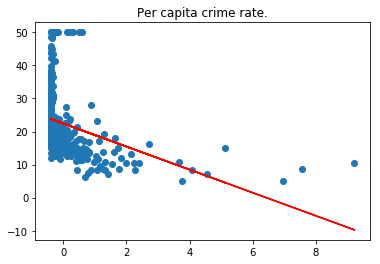

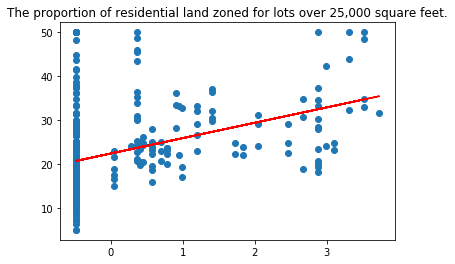

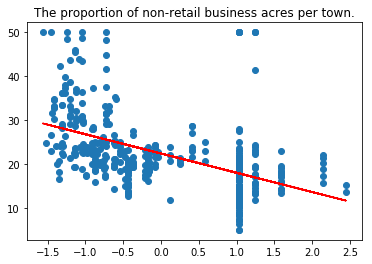

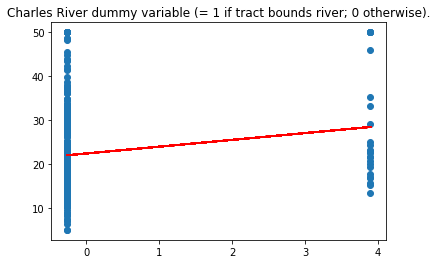

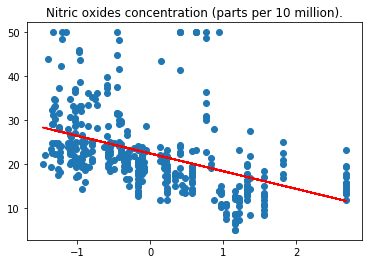

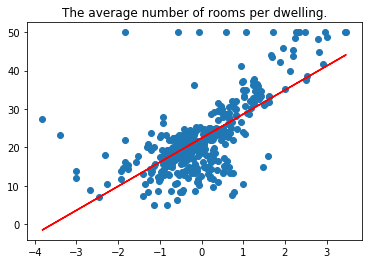

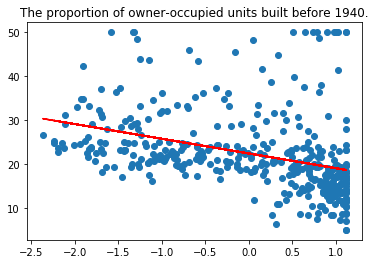

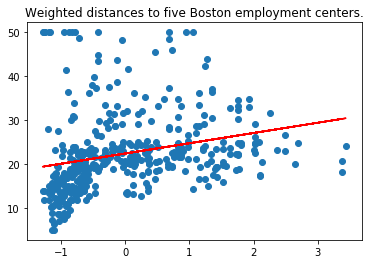

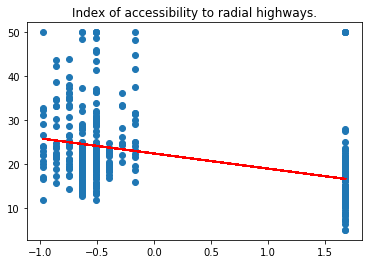

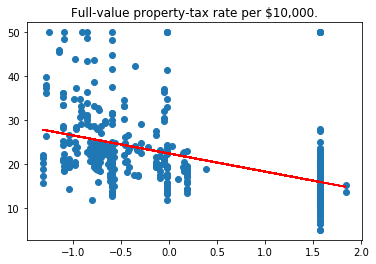

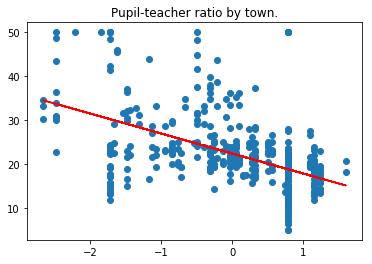

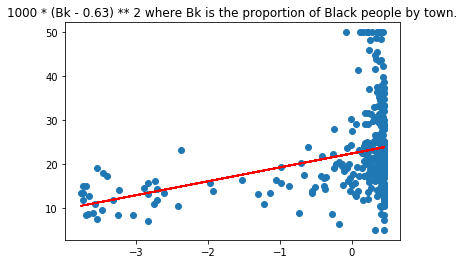

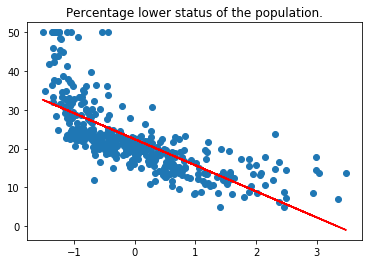

In [49]:
for dimension in range(13):
    x = train_data[:,dimension]
    y = train_labels
    plt.scatter(x, y)
    
    # Plot the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r")
    
    plt.title(feature_names[dimension])
    plt.show()

In [38]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    # custom R2-score metrics for keras backend


    def r2_keras(y_true, y_pred):
        SS_res =  tf.keras.backend.sum(tf.keras.backend.square(y_true - y_pred)) 
        SS_tot = tf.keras.backend.sum(tf.keras.backend.square(y_true - tf.keras.backend.mean(y_true))) 
        return ( 1 - SS_res/(SS_tot + tf.keras.backend.epsilon()) )

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', r2_keras])
    return model

model = build_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [40]:
EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=1)


Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 85us/step - loss: 1.2603 - mean_absolute_error: 0.7794 - r2_keras: 0.9814 - val_loss: 14.1581 - val_mean_absolute_error: 2.4071 - val_r2_keras: 0.8162
Epoch 2/500
323/323 [==============================] - 0s 83us/step - loss: 1.0360 - mean_absolute_error: 0.6963 - r2_keras: 0.9859 - val_loss: 13.3532 - val_mean_absolute_error: 2.3668 - val_r2_keras: 0.8251
Epoch 3/500
323/323 [==============================] - 0s 85us/step - loss: 1.2093 - mean_absolute_error: 0.7741 - r2_keras: 0.9850 - val_loss: 14.0289 - val_mean_absolute_error: 2.4212 - val_r2_keras: 0.8169
Epoch 4/500
323/323 [==============================] - 0s 86us/step - loss: 1.1023 - mean_absolute_error: 0.7341 - r2_keras: 0.9854 - val_loss: 14.6872 - val_mean_absolute_error: 2.5169 - val_r2_keras: 0.8057
Epoch 5/500
323/323 [==============================] - 0s 84us/step - loss: 1.1602 - mean_absolute_error: 0.7722 - r2_k

Epoch 40/500
323/323 [==============================] - 0s 109us/step - loss: 1.0402 - mean_absolute_error: 0.6995 - r2_keras: 0.9862 - val_loss: 13.7994 - val_mean_absolute_error: 2.3282 - val_r2_keras: 0.8251
Epoch 41/500
323/323 [==============================] - 0s 81us/step - loss: 1.0125 - mean_absolute_error: 0.6752 - r2_keras: 0.9860 - val_loss: 14.3314 - val_mean_absolute_error: 2.3829 - val_r2_keras: 0.8151
Epoch 42/500
323/323 [==============================] - 0s 114us/step - loss: 1.1028 - mean_absolute_error: 0.7178 - r2_keras: 0.9829 - val_loss: 13.7427 - val_mean_absolute_error: 2.2630 - val_r2_keras: 0.8271
Epoch 43/500
323/323 [==============================] - 0s 101us/step - loss: 1.0308 - mean_absolute_error: 0.7062 - r2_keras: 0.9845 - val_loss: 14.8047 - val_mean_absolute_error: 2.3225 - val_r2_keras: 0.8086
Epoch 44/500
323/323 [==============================] - 0s 96us/step - loss: 1.0687 - mean_absolute_error: 0.7267 - r2_keras: 0.9864 - val_loss: 14.2365 - va

Epoch 79/500
323/323 [==============================] - 0s 104us/step - loss: 0.8718 - mean_absolute_error: 0.6575 - r2_keras: 0.9890 - val_loss: 14.5695 - val_mean_absolute_error: 2.3768 - val_r2_keras: 0.8128
Epoch 80/500
323/323 [==============================] - 0s 96us/step - loss: 0.9621 - mean_absolute_error: 0.6954 - r2_keras: 0.9857 - val_loss: 14.8854 - val_mean_absolute_error: 2.5230 - val_r2_keras: 0.8036
Epoch 81/500
323/323 [==============================] - 0s 125us/step - loss: 0.9284 - mean_absolute_error: 0.6730 - r2_keras: 0.9870 - val_loss: 15.1331 - val_mean_absolute_error: 2.3903 - val_r2_keras: 0.8079
Epoch 82/500
323/323 [==============================] - 0s 109us/step - loss: 0.9763 - mean_absolute_error: 0.6678 - r2_keras: 0.9864 - val_loss: 14.2952 - val_mean_absolute_error: 2.3530 - val_r2_keras: 0.8161
Epoch 83/500
323/323 [==============================] - 0s 111us/step - loss: 0.8331 - mean_absolute_error: 0.6373 - r2_keras: 0.9875 - val_loss: 14.8174 - v

Epoch 118/500
323/323 [==============================] - 0s 104us/step - loss: 0.8774 - mean_absolute_error: 0.6749 - r2_keras: 0.9832 - val_loss: 14.0685 - val_mean_absolute_error: 2.3553 - val_r2_keras: 0.8217
Epoch 119/500
323/323 [==============================] - 0s 134us/step - loss: 0.9310 - mean_absolute_error: 0.6941 - r2_keras: 0.9876 - val_loss: 15.4305 - val_mean_absolute_error: 2.5342 - val_r2_keras: 0.7983
Epoch 120/500
323/323 [==============================] - 0s 144us/step - loss: 0.7954 - mean_absolute_error: 0.6111 - r2_keras: 0.9898 - val_loss: 15.7771 - val_mean_absolute_error: 2.6969 - val_r2_keras: 0.7907
Epoch 121/500
323/323 [==============================] - 0s 129us/step - loss: 1.0148 - mean_absolute_error: 0.6816 - r2_keras: 0.9710 - val_loss: 14.2942 - val_mean_absolute_error: 2.4148 - val_r2_keras: 0.8140
Epoch 122/500
323/323 [==============================] - 0s 127us/step - loss: 0.8134 - mean_absolute_error: 0.5927 - r2_keras: 0.9897 - val_loss: 15.95

323/323 [==============================] - 0s 106us/step - loss: 0.9626 - mean_absolute_error: 0.6895 - r2_keras: 0.9890 - val_loss: 14.5171 - val_mean_absolute_error: 2.4118 - val_r2_keras: 0.8121
Epoch 157/500
323/323 [==============================] - 0s 217us/step - loss: 0.6864 - mean_absolute_error: 0.5525 - r2_keras: 0.9914 - val_loss: 15.6650 - val_mean_absolute_error: 2.6783 - val_r2_keras: 0.7922
Epoch 158/500
323/323 [==============================] - 0s 287us/step - loss: 0.9047 - mean_absolute_error: 0.6530 - r2_keras: 0.9872 - val_loss: 14.2209 - val_mean_absolute_error: 2.3778 - val_r2_keras: 0.8178
Epoch 159/500
323/323 [==============================] - 0s 140us/step - loss: 0.7634 - mean_absolute_error: 0.5954 - r2_keras: 0.9879 - val_loss: 13.6620 - val_mean_absolute_error: 2.3713 - val_r2_keras: 0.8258
Epoch 160/500
323/323 [==============================] - 0s 103us/step - loss: 0.7933 - mean_absolute_error: 0.6219 - r2_keras: 0.9867 - val_loss: 15.2041 - val_mean_

Epoch 195/500
323/323 [==============================] - 0s 88us/step - loss: 0.7437 - mean_absolute_error: 0.5919 - r2_keras: 0.9894 - val_loss: 14.5937 - val_mean_absolute_error: 2.4967 - val_r2_keras: 0.8098
Epoch 196/500
323/323 [==============================] - 0s 98us/step - loss: 0.7791 - mean_absolute_error: 0.6064 - r2_keras: 0.9900 - val_loss: 14.6190 - val_mean_absolute_error: 2.4158 - val_r2_keras: 0.8132
Epoch 197/500
323/323 [==============================] - 0s 91us/step - loss: 0.6827 - mean_absolute_error: 0.5457 - r2_keras: 0.9911 - val_loss: 14.7359 - val_mean_absolute_error: 2.5042 - val_r2_keras: 0.8099
Epoch 198/500
323/323 [==============================] - 0s 87us/step - loss: 0.7028 - mean_absolute_error: 0.5868 - r2_keras: 0.9905 - val_loss: 14.8798 - val_mean_absolute_error: 2.4628 - val_r2_keras: 0.8061
Epoch 199/500
323/323 [==============================] - 0s 93us/step - loss: 0.8658 - mean_absolute_error: 0.6845 - r2_keras: 0.9890 - val_loss: 15.5994 - 

Epoch 234/500
323/323 [==============================] - 0s 75us/step - loss: 0.6934 - mean_absolute_error: 0.5730 - r2_keras: 0.9888 - val_loss: 15.8740 - val_mean_absolute_error: 2.6731 - val_r2_keras: 0.7827
Epoch 235/500
323/323 [==============================] - 0s 85us/step - loss: 0.7717 - mean_absolute_error: 0.6089 - r2_keras: 0.9894 - val_loss: 15.2805 - val_mean_absolute_error: 2.5675 - val_r2_keras: 0.7947
Epoch 236/500
323/323 [==============================] - 0s 81us/step - loss: 0.6351 - mean_absolute_error: 0.5448 - r2_keras: 0.9868 - val_loss: 16.0224 - val_mean_absolute_error: 2.5568 - val_r2_keras: 0.7971
Epoch 237/500
323/323 [==============================] - 0s 79us/step - loss: 0.6979 - mean_absolute_error: 0.5688 - r2_keras: 0.9907 - val_loss: 15.4038 - val_mean_absolute_error: 2.4546 - val_r2_keras: 0.7981
Epoch 238/500
323/323 [==============================] - 0s 119us/step - loss: 0.7441 - mean_absolute_error: 0.6049 - r2_keras: 0.9894 - val_loss: 15.1934 -

Epoch 273/500
323/323 [==============================] - 0s 128us/step - loss: 0.7335 - mean_absolute_error: 0.5911 - r2_keras: 0.9906 - val_loss: 15.0564 - val_mean_absolute_error: 2.4740 - val_r2_keras: 0.8042
Epoch 274/500
323/323 [==============================] - 0s 157us/step - loss: 0.6612 - mean_absolute_error: 0.5525 - r2_keras: 0.9911 - val_loss: 15.4467 - val_mean_absolute_error: 2.4702 - val_r2_keras: 0.7991
Epoch 275/500
323/323 [==============================] - 0s 133us/step - loss: 0.7182 - mean_absolute_error: 0.5877 - r2_keras: 0.9892 - val_loss: 16.2565 - val_mean_absolute_error: 2.6570 - val_r2_keras: 0.7877
Epoch 276/500
323/323 [==============================] - 0s 122us/step - loss: 0.6170 - mean_absolute_error: 0.5222 - r2_keras: 0.9893 - val_loss: 15.1202 - val_mean_absolute_error: 2.4439 - val_r2_keras: 0.8052
Epoch 277/500
323/323 [==============================] - 0s 125us/step - loss: 0.6668 - mean_absolute_error: 0.5684 - r2_keras: 0.9913 - val_loss: 15.43

323/323 [==============================] - 0s 86us/step - loss: 0.7253 - mean_absolute_error: 0.6058 - r2_keras: 0.9909 - val_loss: 14.8956 - val_mean_absolute_error: 2.4608 - val_r2_keras: 0.8082
Epoch 312/500
323/323 [==============================] - 0s 85us/step - loss: 0.7050 - mean_absolute_error: 0.5559 - r2_keras: 0.9909 - val_loss: 16.5039 - val_mean_absolute_error: 2.6660 - val_r2_keras: 0.7835
Epoch 313/500
323/323 [==============================] - 0s 77us/step - loss: 0.6290 - mean_absolute_error: 0.5277 - r2_keras: 0.9909 - val_loss: 17.1406 - val_mean_absolute_error: 2.7551 - val_r2_keras: 0.7698
Epoch 314/500
323/323 [==============================] - 0s 111us/step - loss: 0.7107 - mean_absolute_error: 0.5954 - r2_keras: 0.9906 - val_loss: 15.3969 - val_mean_absolute_error: 2.4561 - val_r2_keras: 0.8007
Epoch 315/500
323/323 [==============================] - 0s 111us/step - loss: 0.5411 - mean_absolute_error: 0.4885 - r2_keras: 0.9931 - val_loss: 15.1299 - val_mean_abs

Epoch 350/500
323/323 [==============================] - 0s 103us/step - loss: 0.6392 - mean_absolute_error: 0.5524 - r2_keras: 0.9909 - val_loss: 15.5867 - val_mean_absolute_error: 2.5123 - val_r2_keras: 0.7999
Epoch 351/500
323/323 [==============================] - 0s 117us/step - loss: 0.6425 - mean_absolute_error: 0.5575 - r2_keras: 0.9870 - val_loss: 15.5608 - val_mean_absolute_error: 2.5148 - val_r2_keras: 0.7989
Epoch 352/500
323/323 [==============================] - 0s 109us/step - loss: 0.5861 - mean_absolute_error: 0.5484 - r2_keras: 0.9909 - val_loss: 15.8757 - val_mean_absolute_error: 2.5017 - val_r2_keras: 0.7962
Epoch 353/500
323/323 [==============================] - 0s 94us/step - loss: 0.6809 - mean_absolute_error: 0.5699 - r2_keras: 0.9877 - val_loss: 15.1672 - val_mean_absolute_error: 2.4537 - val_r2_keras: 0.8038
Epoch 354/500
323/323 [==============================] - 0s 81us/step - loss: 0.5837 - mean_absolute_error: 0.5048 - r2_keras: 0.9926 - val_loss: 15.6596

Epoch 389/500
323/323 [==============================] - 0s 101us/step - loss: 0.6640 - mean_absolute_error: 0.5498 - r2_keras: 0.9917 - val_loss: 15.1313 - val_mean_absolute_error: 2.4574 - val_r2_keras: 0.8072
Epoch 390/500
323/323 [==============================] - 0s 87us/step - loss: 0.5853 - mean_absolute_error: 0.5276 - r2_keras: 0.9920 - val_loss: 17.1322 - val_mean_absolute_error: 2.8165 - val_r2_keras: 0.7677
Epoch 391/500
323/323 [==============================] - 0s 84us/step - loss: 0.5949 - mean_absolute_error: 0.5082 - r2_keras: 0.9918 - val_loss: 15.4715 - val_mean_absolute_error: 2.4989 - val_r2_keras: 0.7932
Epoch 392/500
323/323 [==============================] - 0s 76us/step - loss: 0.4896 - mean_absolute_error: 0.4694 - r2_keras: 0.9930 - val_loss: 16.4078 - val_mean_absolute_error: 2.7015 - val_r2_keras: 0.7859
Epoch 393/500
323/323 [==============================] - 0s 89us/step - loss: 0.6594 - mean_absolute_error: 0.5573 - r2_keras: 0.9911 - val_loss: 16.6743 -

323/323 [==============================] - 0s 79us/step - loss: 0.4839 - mean_absolute_error: 0.4931 - r2_keras: 0.9940 - val_loss: 16.1258 - val_mean_absolute_error: 2.6239 - val_r2_keras: 0.7854
Epoch 428/500
323/323 [==============================] - 0s 77us/step - loss: 0.6225 - mean_absolute_error: 0.5759 - r2_keras: 0.9800 - val_loss: 15.7898 - val_mean_absolute_error: 2.4670 - val_r2_keras: 0.7900
Epoch 429/500
323/323 [==============================] - 0s 77us/step - loss: 0.4928 - mean_absolute_error: 0.4893 - r2_keras: 0.9931 - val_loss: 15.4879 - val_mean_absolute_error: 2.4491 - val_r2_keras: 0.7971
Epoch 430/500
323/323 [==============================] - 0s 77us/step - loss: 0.6170 - mean_absolute_error: 0.5356 - r2_keras: 0.9920 - val_loss: 15.5925 - val_mean_absolute_error: 2.5121 - val_r2_keras: 0.7935
Epoch 431/500
323/323 [==============================] - 0s 76us/step - loss: 0.4184 - mean_absolute_error: 0.4151 - r2_keras: 0.9949 - val_loss: 15.7035 - val_mean_absol

323/323 [==============================] - 0s 92us/step - loss: 0.5089 - mean_absolute_error: 0.4906 - r2_keras: 0.9928 - val_loss: 14.9925 - val_mean_absolute_error: 2.4063 - val_r2_keras: 0.8041
Epoch 466/500
323/323 [==============================] - 0s 86us/step - loss: 0.4820 - mean_absolute_error: 0.4974 - r2_keras: 0.9936 - val_loss: 15.7938 - val_mean_absolute_error: 2.4021 - val_r2_keras: 0.7922
Epoch 467/500
323/323 [==============================] - 0s 81us/step - loss: 0.6300 - mean_absolute_error: 0.5640 - r2_keras: 0.9915 - val_loss: 14.8002 - val_mean_absolute_error: 2.4051 - val_r2_keras: 0.8061
Epoch 468/500
323/323 [==============================] - ETA: 0s - loss: 0.9048 - mean_absolute_error: 0.5800 - r2_keras: 0.98 - 0s 86us/step - loss: 0.4612 - mean_absolute_error: 0.4562 - r2_keras: 0.9931 - val_loss: 15.7158 - val_mean_absolute_error: 2.4320 - val_r2_keras: 0.7910
Epoch 469/500
323/323 [==============================] - 0s 82us/step - loss: 0.5124 - mean_absolu

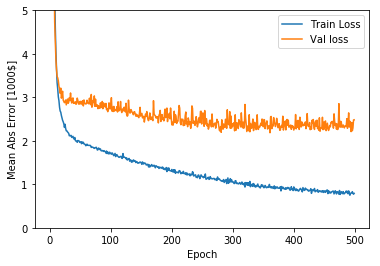

In [15]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)


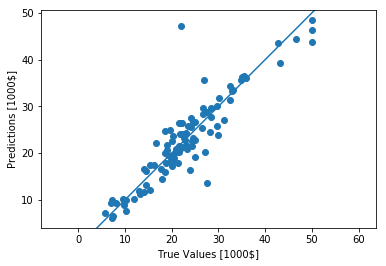

In [16]:
test_predictions = model.predict(test_data).flatten()
plt.scatter(test_labels, test_predictions)

plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])


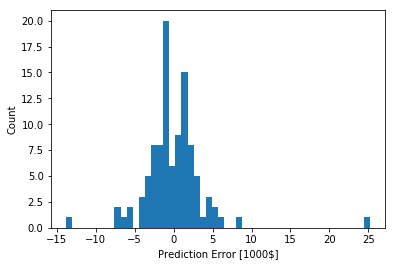

In [17]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")
